In [2]:
import pandas as pd

FILEPATH = "files/tabula_page_finding.xlsx"
df = pd.read_excel(FILEPATH)
df = df.rename(columns={
    "Está correto?" : "is_correct", 
    "Páginas (Se incorreto)" : "correct_pages"
})

In [3]:
df_filter = df.dropna(subset=["is_correct", "correct_pages"], how="any")
df_filter.head(5)

,id,descricaoFundo,dataReferencia,dataEntrega,nomePregao,url,doc_path,Hyperlink,pages_w_table,is_correct,correct_pages
0,693217,XP MALLS FUNDO DE INVESTIMENTO IMOBILIÁRIO FII,2024-06-28,2024-07-06 00:14:00,FII XP MALLS,https://fnet.bmfbovespa.com.br/fnet/publico/do...,C:\Users\Paulo\OneDrive\Documentos\Estudos\PUC...,C:\Users\Paulo\OneDrive\Documentos\Estudos\PUC...,"3,8,9,11,13,14",Não,"3, 8, 9, 11"
1,693211,VINCI IMOVEIS URBANOS FUNDO DE INVESTIMENTO IM...,2024-06-28,2024-07-05 21:43:00,FII VINCI IU,https://fnet.bmfbovespa.com.br/fnet/publico/do...,C:\Users\Paulo\OneDrive\Documentos\Estudos\PUC...,C:\Users\Paulo\OneDrive\Documentos\Estudos\PUC...,"3,6,8,10,11,16",Não,"3, 6, 8, 9, 10"
2,693210,VINCI OFFICES FUNDO DE INVESTIMENTO IMOBILIÁRIO,2024-06-28,2024-07-05 21:42:00,FII VINCI OF,https://fnet.bmfbovespa.com.br/fnet/publico/do...,C:\Users\Paulo\OneDrive\Documentos\Estudos\PUC...,C:\Users\Paulo\OneDrive\Documentos\Estudos\PUC...,"3,6,7,9,10,11,14",Não,"3, 6, 9, 10, 11"
3,693209,VINCI LOGÍSTICA FUNDO DE INVESTIMENTO IMOBILIÁ...,2024-06-28,2024-07-05 21:41:00,FII VINCI LG,https://fnet.bmfbovespa.com.br/fnet/publico/do...,C:\Users\Paulo\OneDrive\Documentos\Estudos\PUC...,C:\Users\Paulo\OneDrive\Documentos\Estudos\PUC...,"4,9,11,13,18,19,24,25",Não,"3, 9, 11,12,13,18,19,20,21,22,23,24,25"
4,693208,VINCI INSTRUMENTOS FINANCEIROS FUNDO DE INVEST...,2024-06-28,2024-07-05 21:38:00,FII VINCI IF,https://fnet.bmfbovespa.com.br/fnet/publico/do...,C:\Users\Paulo\OneDrive\Documentos\Estudos\PUC...,C:\Users\Paulo\OneDrive\Documentos\Estudos\PUC...,"3,7,8,9,11,12,15",Não,"3,7,9,11,12,15"


In [4]:
df_study = df_filter[["id", "pages_w_table", "is_correct", "correct_pages"]]
df_study.loc[df_study["is_correct"] == "Sim", "correct_pages"] = df_study["pages_w_table"] # Copia as páginas corretas para a coluna correct_pages
df_study.head(5)

,id,pages_w_table,is_correct,correct_pages
0,693217,"3,8,9,11,13,14",Não,"3, 8, 9, 11"
1,693211,"3,6,8,10,11,16",Não,"3, 6, 8, 9, 10"
2,693210,"3,6,7,9,10,11,14",Não,"3, 6, 9, 10, 11"
3,693209,"4,9,11,13,18,19,24,25",Não,"3, 9, 11,12,13,18,19,20,21,22,23,24,25"
4,693208,"3,7,8,9,11,12,15",Não,"3,7,9,11,12,15"


In [5]:
df_compare_pages = df_study[["id", "pages_w_table", "correct_pages"]]
df_compare_pages["list_tabula"] = df_compare_pages["pages_w_table"].str.replace(" ", "").str.split(",")
df_compare_pages["list_correct"] = df_compare_pages["correct_pages"].str.replace(" ", "").str.split(",")
df_compare_pages.head(5)

,id,pages_w_table,correct_pages,list_tabula,list_correct
0,693217,"3,8,9,11,13,14","3, 8, 9, 11","[3, 8, 9, 11, 13, 14]","[3, 8, 9, 11]"
1,693211,"3,6,8,10,11,16","3, 6, 8, 9, 10","[3, 6, 8, 10, 11, 16]","[3, 6, 8, 9, 10]"
2,693210,"3,6,7,9,10,11,14","3, 6, 9, 10, 11","[3, 6, 7, 9, 10, 11, 14]","[3, 6, 9, 10, 11]"
3,693209,"4,9,11,13,18,19,24,25","3, 9, 11,12,13,18,19,20,21,22,23,24,25","[4, 9, 11, 13, 18, 19, 24, 25]","[3, 9, 11, 12, 13, 18, 19, 20, 21, 22, 23, 24,..."
4,693208,"3,7,8,9,11,12,15","3,7,9,11,12,15","[3, 7, 8, 9, 11, 12, 15]","[3, 7, 9, 11, 12, 15]"


In [6]:
df_count_pos_neg = df_compare_pages[["id", "list_tabula", "list_correct"]]
df_count_pos_neg["total_tables"] = df_count_pos_neg.apply(lambda row: len(row["list_tabula"]), axis=1)
df_count_pos_neg["pos"] = df_count_pos_neg.apply(lambda row:        len(set(row["list_tabula"]).intersection(set(row["list_correct"]))), axis=1)
df_count_pos_neg["false_neg"] = df_count_pos_neg.apply(lambda row:  len(set(row["list_correct"]) - set(row["list_tabula"])), axis=1)
df_count_pos_neg["false_pos"] = df_count_pos_neg.apply(lambda row:  len(set(row["list_tabula"]) - set(row["list_correct"])), axis=1)
df_count_pos_neg.head(5)

C:\Users\Paulo\AppData\Local\Temp\ipykernel_30356\199496701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_count_pos_neg["total_tables"] = df_count_pos_neg.apply(lambda row: len(row["list_tabula"]), axis=1)


,id,list_tabula,list_correct,total_tables,pos,false_neg,false_pos
0,693217,"[3, 8, 9, 11, 13, 14]","[3, 8, 9, 11]",6,4,0,2
1,693211,"[3, 6, 8, 10, 11, 16]","[3, 6, 8, 9, 10]",6,4,1,2
2,693210,"[3, 6, 7, 9, 10, 11, 14]","[3, 6, 9, 10, 11]",7,5,0,2
3,693209,"[4, 9, 11, 13, 18, 19, 24, 25]","[3, 9, 11, 12, 13, 18, 19, 20, 21, 22, 23, 24,...",8,7,6,1
4,693208,"[3, 7, 8, 9, 11, 12, 15]","[3, 7, 9, 11, 12, 15]",7,6,0,1


In [7]:
total_amount_pages = df_count_pos_neg["list_correct"].apply(lambda x: len(x)).sum()
total_amount_pages

229

In [8]:
df_count_pos_neg.to_csv("count_tables.csv", index=False, sep=";")

In [11]:
# settings the variables and metrics

total_tables = df_count_pos_neg["total_tables"].sum()
total_pos = df_count_pos_neg["pos"].sum()
total_false_neg = df_count_pos_neg["false_neg"].sum()
total_false_pos = df_count_pos_neg["false_pos"].sum()

metrics = ["Total Tables", "Positive", "False Positives", "False Negatives"]
metrics_values = [total_tables, total_pos, total_false_pos, total_false_neg]

total_detected = total_pos + total_false_pos + total_false_neg
percent_positive = (total_pos / total_detected) * 100
percent_falso_positive = (total_false_pos / total_detected) * 100
percent_false_negative = (total_false_neg / total_detected) * 100

metrics_2 = ["Total Pages", "Positive (%)", "False Positives (%)", "False Negatives (%)"]
metrics_values_2 = [total_amount_pages, percent_positive, percent_falso_positive, percent_false_negative]

print(*zip(metrics, metrics_values))
print(*zip(metrics_2, metrics_values_2))

('Total Tables', 259) ('Positive', 196) ('False Positives', 63) ('False Negatives', 33)
('Total Pages', 229) ('Positive (%)', 67.12328767123287) ('False Positives (%)', 21.575342465753426) ('False Negatives (%)', 11.301369863013697)


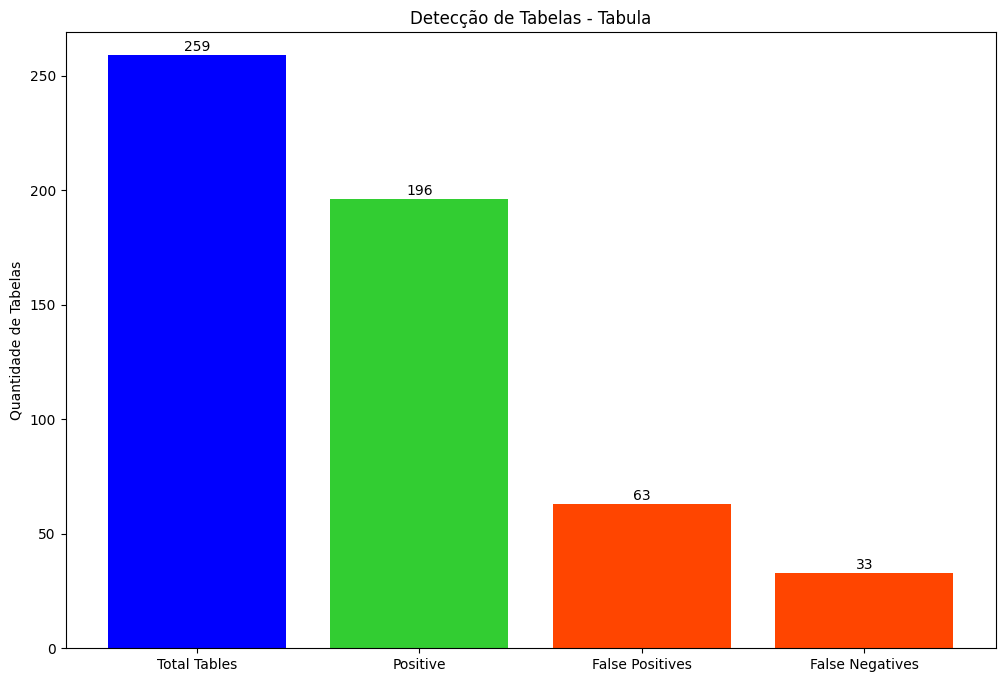

In [12]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 8))
bars = plt.bar(
    metrics, 
    metrics_values,
    color=["blue", "limegreen", "orangered", "orangered"]
)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

plt.ylim(0, max(metrics_values) + 10)
plt.ylabel('Quantidade de Tabelas')
plt.title('Detecção de Tabelas - Tabula')

# Mostrar o gráfico
plt.show()


In [ ]:
plt.figure(figsize=(12, 8))
bars = plt.(
    metrics, 
    metrics_values,
    color=["blue", "limegreen", "orangered", "orangered"]
)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

plt.ylim(0, max(metrics_values) + 10)
plt.ylabel('Quantidade de Tabelas')
plt.title('Detecção de Tabelas - Tabula')

# Mostrar o gráfico
plt.show()